In [2]:
# Importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
# Importing The Dataset
dataset = pd.read_csv('student-mat.csv', sep=';')
X = dataset.iloc[:, 0:32]
X2 = dataset.iloc[:, 0:32]
y = dataset.iloc[:, 32]

In [43]:
print(dataset.head(7))

  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        6   5   6   6  
1  ...      5        3      3     1     1      3        4   5   5   6  
2  ...      4        3      2     2     3      3       10   7   8  10  
3  ...      3        2      2     1     1      5        2  15  14  15  
4  ...      4        3 

In [44]:
dataset.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel fre

In [45]:
print(dataset.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [46]:
print(dataset.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


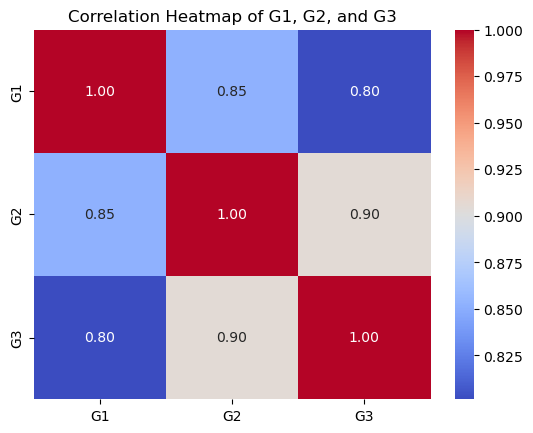

In [51]:
import seaborn as sns

# Assuming 'G1', 'G2', and 'G3' are the columns of interest
heatmap_data = dataset[['G1', 'G2', 'G3']]

# Compute the correlation matrix
corr_matrix = heatmap_data.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of G1, G2, and G3')
plt.show()


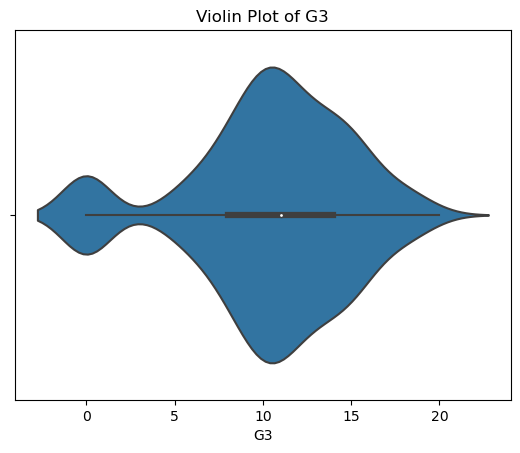

In [49]:
import seaborn as sns

# Assuming 'G3' is the column of interest
sns.violinplot(x='G3', data=dataset)
plt.title('Violin Plot of G3')
plt.show()

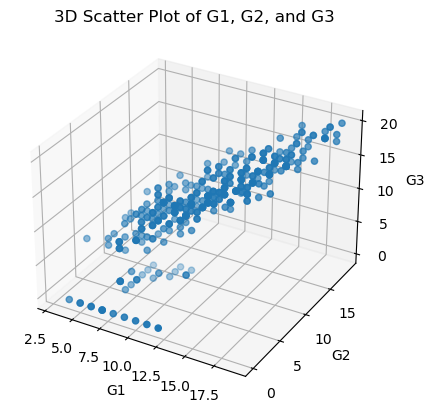

In [50]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assuming 'G1', 'G2', and 'G3' are the columns of interest
ax.scatter(dataset['G1'], dataset['G2'], dataset['G3'])
ax.set_xlabel('G1')
ax.set_ylabel('G2')
ax.set_zlabel('G3')
plt.title('3D Scatter Plot of G1, G2, and G3')
plt.show()


In [4]:
# -Grades in average are better :
#    -for students in the schoole of "GP" - Gabriel Pereira, 
#    -for students living in "U" - urban, 
#    -for family size "LE3" - less or equal to 3, 
#    -for parent's cohabitation status of "A" - apart, 
#    -for students who has fathers  work as teacher and mothers work in health, 
#    -for students who choose their schools because of reputation and other reasons
#    -for students whom their guardian is their father 
#    -for students whom their home to school travel time is 1 - <15 min.
#    -for students who study the most 
#    -for students whom have no extra educational support
#    -for students whom have no family educational support
#    -for students whom have extra paid classes within the course subject
#    -for students who do extra-curricular activities 
#    -for students who attended nursery school
#    -for students who wants higher education
#    -for students whom have internet access
#    -for students with a romantic relationship
#    -for students whom have a free time after school of (from  1 to 5, 2 and 5 are the best)
#    -for students who go out with friends a little bit (from  1 to 5, 2 is the best)
#    -for students with very low consumption rate (from  1 to 5, 1 is the best)
#    -for students whom are the most healthy
# -Best Grades in average are of males and students who are 20 years old 
# -males are 187 (47.34%) and females are 208 (52.66%)
# -the quality of family relationships doesn't have a straight impact or a big impact on grades
# -the number of absences doesn't show straight impact on the grades 

In [5]:
# Encoding Categorical Data
labelEncoder_X = LabelEncoder()

variables_to_labelEncode = [0, 1, 3, 4, 5, 8, 9 ,10 , 11, 15, 16, 17, 18, 19, 20, 21, 22]

In [6]:
for i in variables_to_labelEncode:
    X.iloc[:, i] = labelEncoder_X.fit_transform(X.iloc[:, i])

In [7]:
# One Hot Encoding
oneHotEncoder_X = OneHotEncoder(sparse = False)

In [8]:
X['Mjob_at_home'] = oneHotEncoder_X.fit_transform(X[['Mjob']])[:, 0]
X['Mjob_health'] = oneHotEncoder_X.fit_transform(X[['Mjob']])[:, 1]
X['Mjob_other'] = oneHotEncoder_X.fit_transform(X[['Mjob']])[:, 2]
X['Mjob_services'] = oneHotEncoder_X.fit_transform(X[['Mjob']])[:, 3]

In [9]:
X['Fjob_at_home'] = oneHotEncoder_X.fit_transform(X[['Fjob']])[:, 0]
X['Fjob_health'] = oneHotEncoder_X.fit_transform(X[['Fjob']])[:, 1]
X['Fjob_other'] = oneHotEncoder_X.fit_transform(X[['Fjob']])[:, 2]
X['Fjob_services'] = oneHotEncoder_X.fit_transform(X[['Fjob']])[:, 3]

In [10]:
X['reason_course'] = oneHotEncoder_X.fit_transform(X[['reason']])[:, 0]
X['reason_other'] = oneHotEncoder_X.fit_transform(X[['reason']])[:, 1]
X['reason_home'] = oneHotEncoder_X.fit_transform(X[['reason']])[:, 2]

In [11]:
X['guardian_father'] = oneHotEncoder_X.fit_transform(X[['guardian']])[:, 0]
X['guardian_mother'] = oneHotEncoder_X.fit_transform(X[['guardian']])[:, 1]

In [12]:
# Drop old columns
X.drop(['Mjob', 'Fjob', 'reason', 'guardian'],axis='columns', inplace=True)

In [13]:
# Reorder columns
X = X[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 
       'Mjob_services', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'reason_course', 'reason_other', 
       'reason_home', 'guardian_father', 'guardian_mother','traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 
       'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 
       'health', 'absences', 'G1', 'G2']]

In [14]:
# Dimensionality Reduction
variance_vector = X.var()

In [15]:
correlation_matrix = X.corr()

In [16]:
# Droping some variables due to high correlation between them and other variables

    # father's education is more important for children than mother's so delete Medu
    # Walc and Dalc => drop Walc because drinking in workday has more impact than week end
    # G1 and G2 => dropped  first semester's grades because the second semester is more close the the third semester, 
X.drop(['Medu', 'Walc', 'G1'],axis='columns', inplace=True)

In [17]:
# Using Random Forest Feature importance to select the most important features
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)

In [18]:
model.fit(X,y)

RandomForestRegressor(max_depth=10, random_state=1)

In [19]:
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-1:-12:-1]

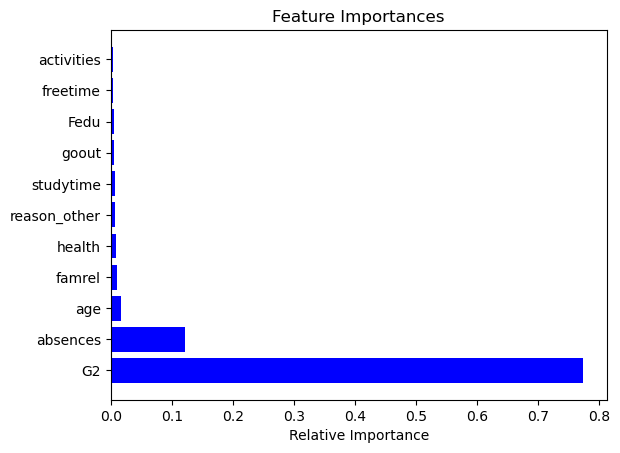

In [20]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [21]:
X = X.iloc[:, indices]

In [22]:
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model)
Fit = feature.fit_transform(X, y)

In [23]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [27]:
y_scaler = StandardScaler()
y_train = np.array(y_train).reshape(-1, 1)
y_train = y_scaler.fit_transform(y_train)

In [28]:
# Using Principal Component Analysis to extract the most important features
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=11)

In [30]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

<BarContainer object of 11 artists>

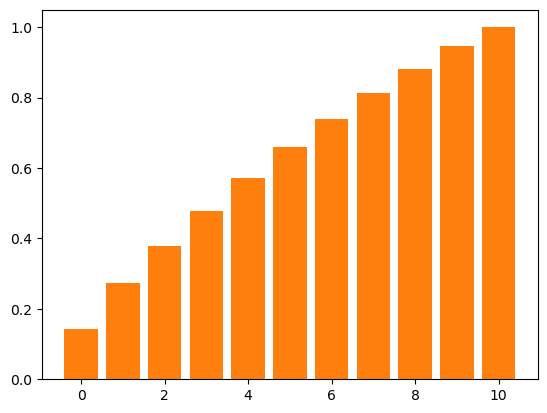

In [31]:
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.bar(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))

<BarContainer object of 4 artists>

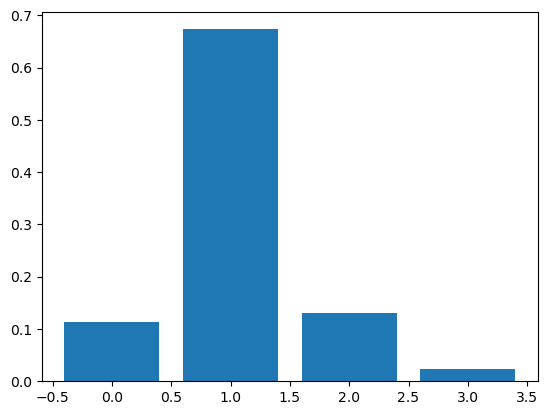

In [32]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=4)
svd_result = svd.fit_transform(X.values)
plt.bar(range(4), svd.explained_variance_ratio_)

In [33]:
# Train a Support Vector Regression model on the preprocessed data
from sklearn import svm
svr = svm.SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
y_pred = y_pred.reshape(-1, 1)
y_pred = y_scaler.inverse_transform(y_pred)

C:\Users\21jg1\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [35]:
#### with PCA (21 most important components): RMSE = 2.8945364384836916
#### with PCA (All components): RMSE = 2.4168045073395628
#### without dimensionality reduction technique: RMSE = 2.7208641723700726
#### with 11 features  and : RMSE = 2.1022008340843232
#### (feature selection based on multicollinearity and random forest feature importance)

In [36]:
# Using a Simple linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred)

In [37]:
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [38]:
#### with PCA (21 most important components): RMSE = 2.7150229671546686
#### with PCA (All components): RMSE = 1.955979283731477
#### without dimensionality reduction technique: RMSE = 1.969876872388883
#### with 11 features  and : RMSE = 1.989072849694719
#### (feature selection based on multicollinearity and random forest feature importance)

In [39]:
############################## CONCLUSIONS ###################################

# - well after analysing the obtained results we can conclude that the SVR outperforms the linear regression model when 
# fitting a large number of features, because SVR works better in larger datasets or because of including some features which 
# seemed unimportant gives non-linearity advantage to the SVR over the LR model
# reducing the number of features or even extracting new features with PCA reduces the prediction accuracy.

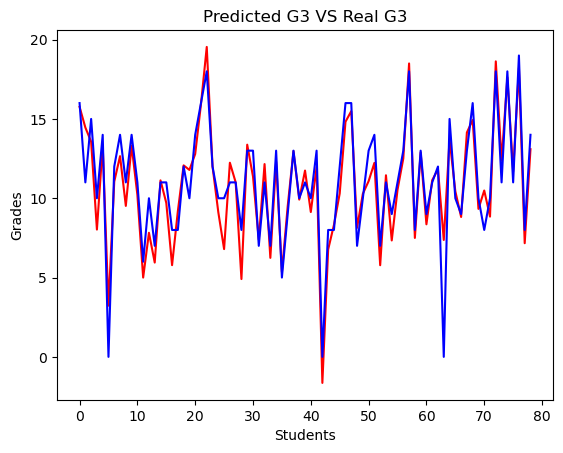

In [40]:
plt.plot(range(len(y_pred)), y_pred, color = 'red')
plt.plot(range(len(y_test)), y_test, color = 'blue')
plt.title('Predicted G3 VS Real G3')
plt.xlabel('Students')
plt.ylabel('Grades')
plt.show()

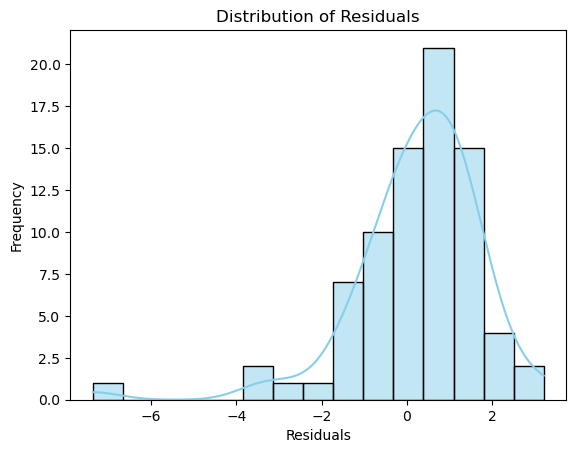

In [55]:
import seaborn as sns

# Plot distribution of residuals
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

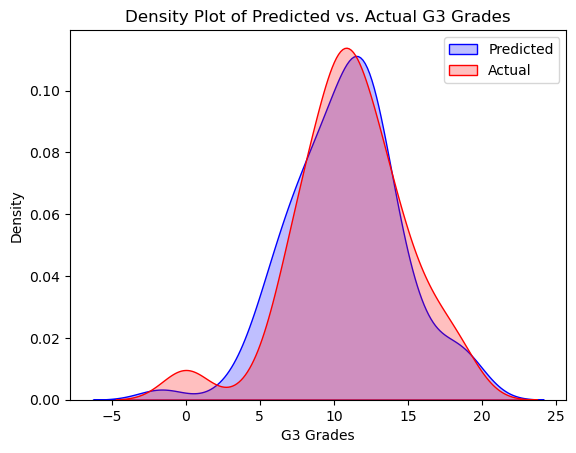

In [58]:
sns.kdeplot(y_pred.ravel(), color='blue', label='Predicted', shade=True)
sns.kdeplot(y_test.ravel(), color='red', label='Actual', shade=True)
plt.title('Density Plot of Predicted vs. Actual G3 Grades')
plt.xlabel('G3 Grades')
plt.ylabel('Density')
plt.legend()
plt.show()


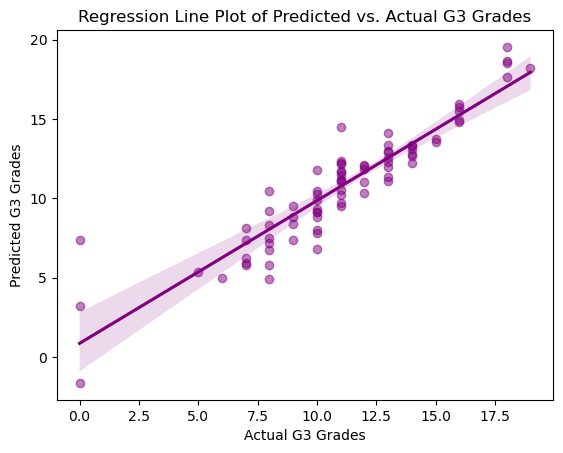

In [59]:
sns.regplot(x=y_test.ravel(), y=y_pred.ravel(), color='purple', scatter_kws={'alpha':0.5})
plt.title('Regression Line Plot of Predicted vs. Actual G3 Grades')
plt.xlabel('Actual G3 Grades')
plt.ylabel('Predicted G3 Grades')
plt.show()
